In [1]:
import time
from IPython.display import clear_output
import random
import matplotlib.pyplot as plt
import numpy as np

In [102]:
class Minimization:
    def __init__(self,function,bounds,md,dna=None):
        
        # вносим параметры
        self.function = function
        self.bounds = np.array(bounds)
        self.md = md
        
        # координаты - это случайная величина между границами (bounds)
        if dna is not None:
            self.dna = dna
        else:
            self.dna = np.random.uniform(self.bounds[:,0],self.bounds[:,1])
        
        # сразу считаем значение функции в получившихся координатах 
        self.fitness = self.function(self.dna)
    

    # функция смещающая координаты на случайное значение
    def mutate(self):
        
        # случайное смещение, и проверка, что оно попадает в границы
        while True:
            new_dna = np.random.normal(self.dna,self.md)
            if np.all(new_dna < self.bounds[:,1]) and np.all(new_dna > self.bounds[:,0]):
                break
                
        return Minimization(self.function,self.bounds,self.md,new_dna)
        
        
    # функция проведения рекомбинации между двумя особями
    # в результате получаем новую особь, как и в mutate()
    # просто меняем местами куски координат
    def recombinate(self,other):
        a = random.randint(0,len(self.dna))
        b = random.randint(0,len(self.dna))
        a,b = (a,b) if a < b else (b,a)
        
        dna = self.dna.copy()
        dna[a:b] = other.dna[a:b] 
    
        return Minimization(self.function,self.bounds,self.md,dna)

In [103]:
def minimimize_function(function,bounds,md,generations,pop_size,keep_size,spawn_size,mr=0.5,rr=0.1):
    
    # создаём начальную популяцию
    pop = np.array([Minimization(function,bounds,md) for i in range(pop_size)],dtype='object')
    
    history = np.empty((0,2,pop_size),dtype='object')
    
    # создание сетки для функции
    # создаём много точек между нашими границами и считаем значение функции в них
    # это нужно для отрисовки графика (а именно функции plt.contour())
    plt.ion()
    if len(bounds) == 2:
        fig,ax = plt.subplots()
        x = np.linspace(bounds[0][0],bounds[0][1],100)
        y = np.linspace(bounds[1][0],bounds[1][1],100)
        x,y = np.meshgrid(x,y)
        z = function([x,y])
    
    # цикл обучения, теперь мы не знаем точного ответа, так что ограничиваем 
    # работы цикла количеством итераций
    for i in range(generations):
        
        # спавн случайных точек
        spawn = [Minimization(function,bounds,md) for i in range(spawn_size)]
        pop = np.append(pop,spawn)
        
        # мутации и рекомбинации
        for j in range(pop_size+spawn_size):
            if np.random.random() < mr:
                new_pop = pop[j].mutate()
                pop = np.append(pop,new_pop) 
            if np.random.random() < rr:
                new_pop = pop[j].recombinate(pop[np.random.randint(pop_size+spawn_size)])
                pop = np.append(pop,new_pop)
        
        # отбор по fitness
        pop = sorted(pop,key = lambda x: x.fitness)
        pop=pop[:keep_size]
        
        # размножение оставшихся
        if pop_size-keep_size > 0 and i > 3:
            pop = np.append(pop,np.random.choice(a=pop,size=pop_size-keep_size))
        
        history = np.append(history,[[[p.fitness for p in pop],pop]],axis=0)
        
        # отрисовка значения fitness - значения function(dna)
        # и отрисовка координат точек
        if len(bounds) == 2 and i%5 == 0:
            clear_output(wait = True)
            fig.clf()
            plt.xlim(bounds[0][0],bounds[0][1])
            plt.ylim(bounds[1][0],bounds[1][1])
            plt.title(f'{i} generation')
            plt.contour(x,y,z,levels=10)
            dnas = np.array([p.dna for p in pop])
            plt.scatter(dnas[:,0],dnas[:,1],color='red',s = 5)
            fig.canvas.draw()
            plt.pause(0.01)
        
        # в случае, если наилучшее значение fitness давно не менялось
        # снижаем у особей параметр md, чтобы мутации смещали их на меньшее значение
        # тем самым увеличиваем точность
        if i > 10 and (history[-1,0,0] == history[-5,0,0]):
            md /= 2
            for p in pop:
                p.md = md
        
    
    fig1, ax1 = plt.subplots()
    ax1.plot(history[:,0,0])
    ax1.set_title('fitness')
    plt.show()
    return history

In [104]:
# простенькая функция
def f1(x):
    return x[0] + x[1]

In [105]:
# функция посложнее
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [106]:
# вообще сложная функция, жесть
def eggholder(x):
    return -(x[1]+47)*np.sin(np.sqrt(np.absolute(x[0]/2+(x[1]+47))))-x[0]*np.sin(np.sqrt(np.absolute(x[0]-(x[1]+47))))

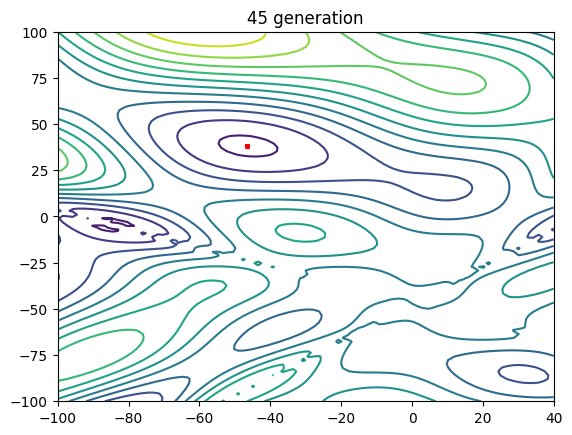

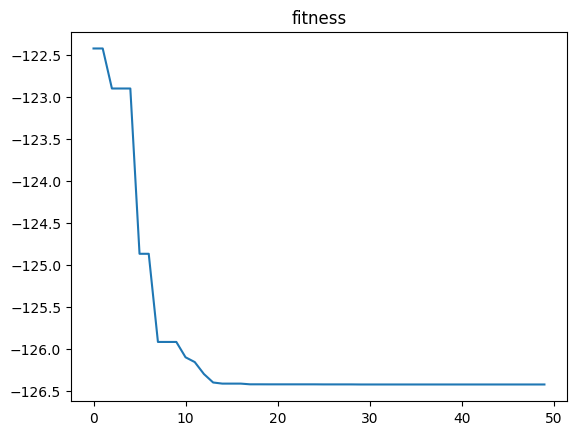

In [119]:
h = minimimize_function(eggholder,[[-100,40],[-100,100]],1,50,100,100,50)

In [114]:
h[:,0,0]

array([-122.97222307048324, -122.97222307048324, -122.97222307048324,
       -122.97222307048324, -129.2443405055914, -129.2443405055914,
       -129.2443405055914, -129.2443405055914, -129.2443405055914,
       -135.53957580816876, -135.53957580816876, -135.53957580816876,
       -137.0408298520579, -137.0408298520579, -148.77508459534414,
       -158.86079686752032, -158.86079686752032, -190.23305056706806,
       -195.6963590651258, -211.8156439950414, -211.8156439950414,
       -211.8156439950414, -211.8156439950414, -215.08341631773823,
       -215.08341631773823, -216.2128818246848, -216.90774964162586,
       -216.98942455981165, -221.73561610935994, -221.73561610935994,
       -221.86487046240197, -223.65139864744458, -224.16251894579258,
       -226.60911027478016, -226.60911027478016, -226.60911027478016,
       -226.60911027478016, -226.60911027478016, -226.73046449553397,
       -226.73046449553397, -226.73046449553397, -227.0880545130919,
       -227.0880545130919, -227.08